# EDA of Correlations within Data

In [17]:
import h5py

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('../histograms.mplstyle')

import scipy.stats

from matplotlib.ticker import ScalarFormatter

In [2]:
FILE_NAME = "../data/RUN001231_channels.h5"

f = h5py.File(FILE_NAME, "r")
keys = f.keys()

df = pd.concat(
    [
        pd.read_hdf(FILE_NAME, key=k, mode="r") for k in keys
    ],
    ignore_index=True
)

df = df.rename(columns={"CH":"ch", "HIT_DRIFT_TIME":"drift_time", "THETA":"theta"})

print(f"Shape: {df.shape}")
print(f'Features: {list(df.columns)}')

Shape: (236533, 4)
Features: ['ch', 'drift_time', 'm', 'theta']


In [3]:
r, p = scipy.stats.pearsonr(df.drift_time, df.theta)
alpha = 0.05

print(f"Correlation coefficient between drift time and theta: {r:.5f}")
print(f"p-value = {p:.5f}")
print("Statistically significant:", "YES" if p < alpha else "NO")

Correlation coefficient between drift time and theta: -0.00502
p-value = 0.01469
Statistically significant: YES


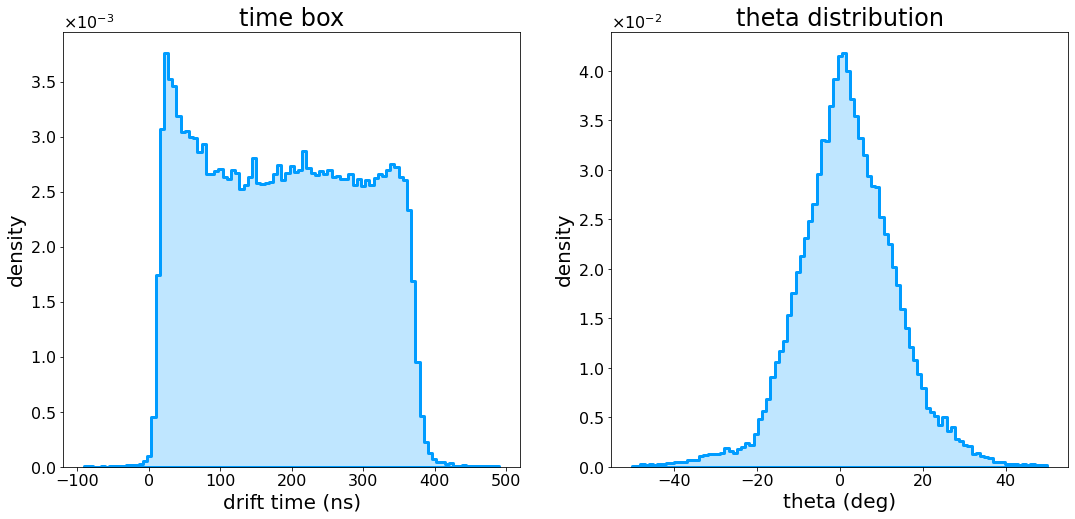

In [29]:
dt_bins    = np.linspace(-90, 490, 100)
theta_bins = np.linspace(-50, 50 ,100)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))

sns.histplot(
    x         = df.drift_time,
    bins      = dt_bins,
    stat      = "density",
    element   = "step",
    fill      = True,
    color     = "#aadeff",
    edgecolor = "#009cff",
    linewidth = 3,
    label     = "full dataset",
    ax        = ax[0]
)

sns.histplot(
    x         = df.theta,
    bins      = theta_bins,
    stat      = "density",
    element   = "step",
    fill      = True,
    color     = "#aadeff",
    edgecolor = "#009cff",
    linewidth = 3,
    label     = "full dataset",
    ax        = ax[1]
)

ax[0].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[0].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))
ax[1].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax[1].ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))

ax[0].set_title("time box")
ax[0].set_xlabel("drift time (ns)")
ax[0].set_ylabel("density")


ax[1].set_title("theta distribution")
ax[1].set_xlabel("theta (deg)")
ax[1].set_ylabel("density")


plt.show()

## Cutting the angular feature

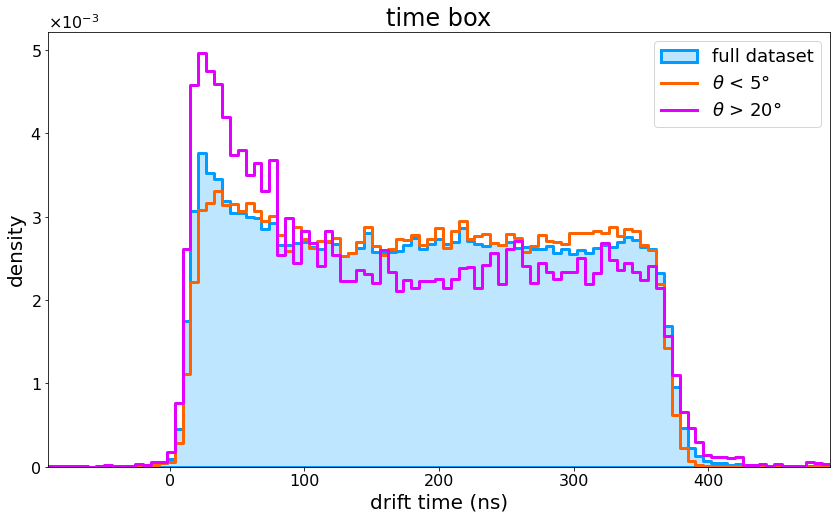

In [26]:
bins = np.linspace(-90, 490, 100)

cut_1 = np.abs(df.theta) < 5
cut_2 = np.abs(df.theta) > 20


fig, ax = plt.subplots()


sns.histplot(
    x         = df.drift_time,
    bins      = bins,
    stat      = "density",
    element   = "step",
    fill      = True,
    color     = "#aadeff",
    edgecolor = "#009cff",
    linewidth = 3,
    label     = "full dataset",
    ax        = ax
)

sns.histplot(
    x         = df[cut_1].drift_time,
    bins      = bins,
    stat      = "density",
    element   = "step",
    fill      = False,
    color     = "#ff6300",
    linewidth = 3,
    label     = r"$\theta$ < 5°",
    ax        = ax
)

sns.histplot(
    x         = df[cut_2].drift_time,
    bins      = bins,
    stat      = "density",
    element   = "step",
    fill      = False,
    color     = "#e200ff",
    linewidth = 3,
    label     = r"$\theta$ > 20°",
    ax        = ax
)

ax.set_xlim(bins[0], bins[-1])

ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis = 'y', style = 'sci', scilimits = (0,0))


ax.set_title("time box")
ax.set_xlabel("drift time (ns)")
ax.set_ylabel("density")

ax.legend(fontsize=18)

plt.show()